<a href="https://colab.research.google.com/github/arvinampongan/MIT504/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis with ARIMA Model**

# **1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# **2. Load Dataset**

In [ ]:
data = pd.read_csv("shampoo_sales.csv") #data is variable only

# **3. Converting**

In [ ]:
data['Month'] = pd.date_range(start='2000-01-01', periods=len(data),freq='M')
data.set_index('Month', inplace=True)

## **4. Plot the Time Series**

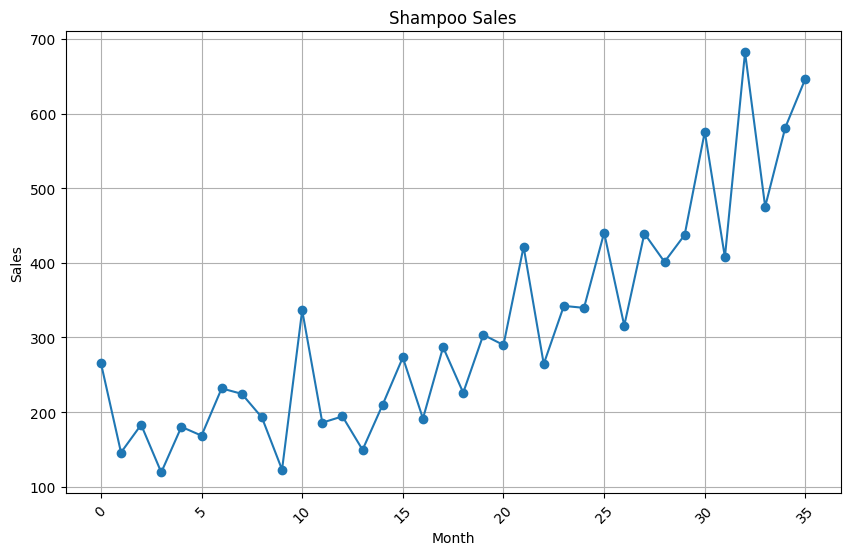

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index,data['Sales'], marker='o', linestyle='-')
plt.title('Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5. Decomposition

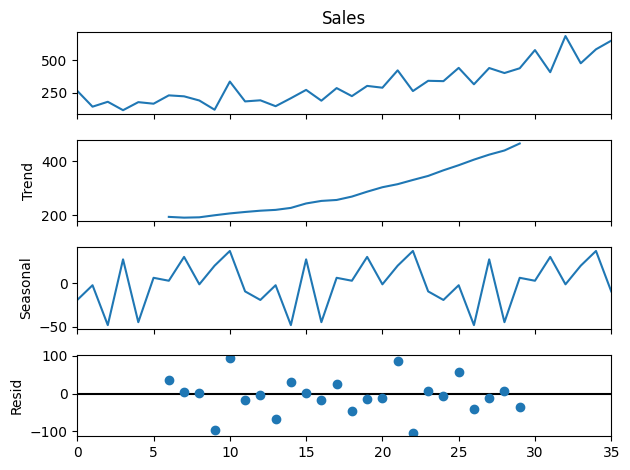

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)

fig = decomposition.plot()

plt.show()

# **6. Fit an ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Sales'], order=(5, 1, 0))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sat, 06 Jul 2024   AIC                            408.969
Time:                        02:17:58   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

# **7. Forecasting Future Values**

<function matplotlib.pyplot.show(close=None, block=None)>

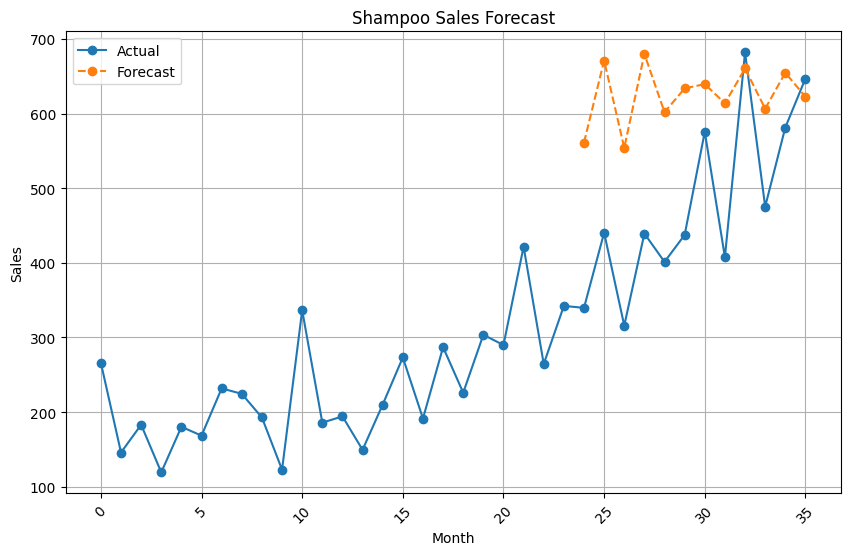

In [ ]:
forecast = results.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', label='Actual')
plt.plot(data.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Shampoo Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show

# **8. Another  type of plotting**

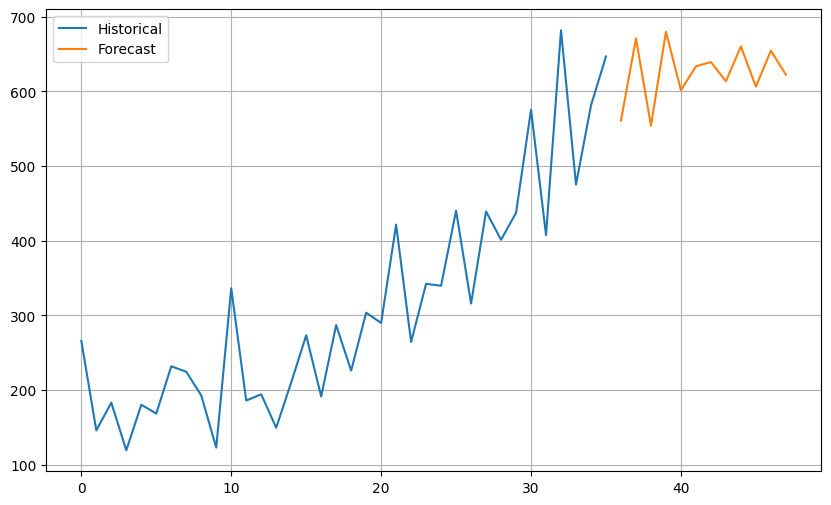

In [ ]:
forecast = results.forecast(steps=12)

plt. figure(figsize=(10, 6))
plt.plot(data.index,data['Sales'], label='Historical')
plt.plot(forecast.index,forecast, label='Forecast')
plt.legend()
plt.grid(True)
plt.show()